In [ ]:
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost import XGBRegressor


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pasion et al dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [ ]:
df.head()

Location      Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  \
0  Camp Murray  20171203  1145     47.11    -122.57        84  2.017120e+11   
1  Camp Murray  20171203  1315     47.11    -122.57        84  2.017120e+11   
2  Camp Murray  20171203  1330     47.11    -122.57        84  2.017120e+11   
3  Camp Murray  20171204  1230     47.11    -122.57        84  2.017120e+11   
4  Camp Murray  20171204  1415     47.11    -122.57        84  2.017120e+11   

   Month  Hour  Season  Humidity  AmbientTemp  PolyPwr  Wind.Speed  \
0     12    11  Winter  81.71997     12.86919  2.42769           5   
1     12    13  Winter  96.64917      9.66415  2.46273           0   
2     12    13  Winter  93.61572     15.44983  4.46836           5   
3     12    12  Winter  77.21558     10.36659  1.65364           5   
4     12    14  Winter  54.80347     16.85471  6.57939           3   

   Visibility  Pressure  Cloud.Ceiling  
0        10.0    1010.6            722  
1        10.0    1011.3             23  
2        10.0    1011.6             32  
3         2.0    1024.4              6  
4         3.0    1023.7              9

In [ ]:
df.describe()

Date          Time      Latitude     Longitude      Altitude  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017720e+07   1267.483725     38.213823   -108.593678    798.843668   
std    4.579585e+03    167.602767      6.323761     16.364130    770.681794   
min    2.017052e+07   1000.000000     20.890000   -156.440000      1.000000   
25%    2.017111e+07   1100.000000     38.160000   -117.260000      2.000000   
50%    2.018032e+07   1300.000000     38.950000   -111.180000    458.000000   
75%    2.018062e+07   1400.000000     41.150000   -104.710000   1370.000000   
max    2.018100e+07   1545.000000     47.520000    -80.110000   1947.000000   

         YRMODAHRMI         Month          Hour      Humidity   AmbientTemp  \
count  2.104500e+04  21045.000000  21045.000000  21045.000000  21045.000000   
mean   2.017718e+11      6.565883     12.627845     37.121941     29.285117   
std    4.579846e+07      2.983958      1.672952     23.823011     12.366820   
min    2.017050e+11      1.000000     10.000000      0.000000    -19.981770   
25%    2.017110e+11      4.000000     11.000000     17.529300     21.915280   
50%    2.018030e+11      7.000000     13.000000     33.123780     30.289150   
75%    2.018060e+11      9.000000     14.000000     52.593990     37.474670   
max    2.018100e+11     12.000000     15.000000     99.987790     65.738370   

            PolyPwr    Wind.Speed    Visibility      Pressure  Cloud.Ceiling  
count  21045.000000  21045.000000  21045.000000  21045.000000   21045.000000  
mean      12.978583     10.318318      9.700071    925.944747     515.966785  
std        7.123255      6.385030      1.351949     85.215659     301.903379  
min        0.257330      0.000000      0.000000    781.700000       0.000000  
25%        6.404570      6.000000     10.000000    845.500000     140.000000  
50%       13.798700      9.000000     10.000000    961.100000     722.000000  
75%       18.863650     14.000000     10.000000   1008.900000     722.000000  
max       34.285020     49.000000     10.000000   1029.500000     722.000000

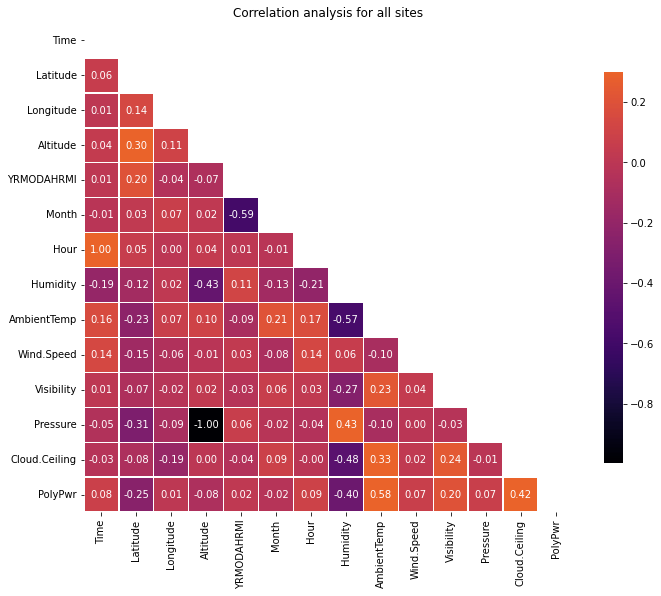

In [ ]:
df_corr = df[['Location', 'Time', 'Latitude', 'Longitude', 'Altitude',
              'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
              'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='inferno', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8});
plt.title('Correlation analysis for all sites');

In [ ]:
# Encode location data
df_location = pd.get_dummies(df, columns=['Location'], drop_first=True)
df_location

Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  \
0      20171203  1145     47.11    -122.57        84  2.017120e+11     12   
1      20171203  1315     47.11    -122.57        84  2.017120e+11     12   
2      20171203  1330     47.11    -122.57        84  2.017120e+11     12   
3      20171204  1230     47.11    -122.57        84  2.017120e+11     12   
4      20171204  1415     47.11    -122.57        84  2.017120e+11     12   
...         ...   ...       ...        ...       ...           ...    ...   
21040  20180928  1530     38.95    -104.83      1947  2.018090e+11      9   
21041  20180929  1300     38.95    -104.83      1947  2.018090e+11      9   
21042  20180929  1400     38.95    -104.83      1947  2.018090e+11      9   
21043  20180929  1500     38.95    -104.83      1947  2.018090e+11      9   
21044  20181001  1400     38.95    -104.83      1947  2.018100e+11     10   

       Hour  Season  Humidity  ...  Location_Hill Weber  Location_JDMT  \
0        11  Winter  81.71997  ...                    0              0   
1        13  Winter  96.64917  ...                    0              0   
2        13  Winter  93.61572  ...                    0              0   
3        12  Winter  77.21558  ...                    0              0   
4        14  Winter  54.80347  ...                    0              0   
...     ...     ...       ...  ...                  ...            ...   
21040    15    Fall  11.66992  ...                    0              0   
21041    13    Fall  18.22510  ...                    0              0   
21042    14    Fall  15.52124  ...                    0              0   
21043    15    Fall   6.63452  ...                    0              0   
21044    14    Fall  22.58301  ...                    0              0   

       Location_Kahului  Location_MNANG  Location_Malmstrom  \
0                     0               0                   0   
1                     0               0                   0   
2                     0               0                   0   
3                     0               0                   0   
4                     0               0                   0   
...                 ...             ...                 ...   
21040                 0               0                   0   
21041                 0               0                   0   
21042                 0               0                   0   
21043                 0               0                   0   
21044                 0               0                   0   

       Location_March AFB  Location_Offutt  Location_Peterson  \
0                       0                0                  0   
1                       0                0                  0   
2                       0                0                  0   
3                       0                0                  0   
4                       0                0                  0   
...                   ...              ...                ...   
21040                   0                0                  0   
21041                   0                0                  0   
21042                   0                0                  0   
21043                   0                0                  0   
21044                   0                0                  0   

       Location_Travis  Location_USAFA  
0                    0               0  
1                    0               0  
2                    0               0  
3                    0               0  
4                    0               0  
...                ...             ...  
21040                0               1  
21041                0               1  
21042                0               1  
21043                0               1  
21044                0               1  

[21045 rows x 27 columns]

In [ ]:
# Encode season data
df_Lseason = pd.get_dummies(df_location, columns=['Season'], drop_first=True)
df_Lseason

Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  \
0      20171203  1145     47.11    -122.57        84  2.017120e+11     12   
1      20171203  1315     47.11    -122.57        84  2.017120e+11     12   
2      20171203  1330     47.11    -122.57        84  2.017120e+11     12   
3      20171204  1230     47.11    -122.57        84  2.017120e+11     12   
4      20171204  1415     47.11    -122.57        84  2.017120e+11     12   
...         ...   ...       ...        ...       ...           ...    ...   
21040  20180928  1530     38.95    -104.83      1947  2.018090e+11      9   
21041  20180929  1300     38.95    -104.83      1947  2.018090e+11      9   
21042  20180929  1400     38.95    -104.83      1947  2.018090e+11      9   
21043  20180929  1500     38.95    -104.83      1947  2.018090e+11      9   
21044  20181001  1400     38.95    -104.83      1947  2.018100e+11     10   

       Hour  Humidity  AmbientTemp  ...  Location_MNANG  Location_Malmstrom  \
0        11  81.71997     12.86919  ...               0                   0   
1        13  96.64917      9.66415  ...               0                   0   
2        13  93.61572     15.44983  ...               0                   0   
3        12  77.21558     10.36659  ...               0                   0   
4        14  54.80347     16.85471  ...               0                   0   
...     ...       ...          ...  ...             ...                 ...   
21040    15  11.66992     43.22510  ...               0                   0   
21041    13  18.22510     28.98247  ...               0                   0   
21042    14  15.52124     33.49167  ...               0                   0   
21043    15   6.63452     51.62163  ...               0                   0   
21044    14  22.58301     32.83958  ...               0                   0   

       Location_March AFB  Location_Offutt  Location_Peterson  \
0                       0                0                  0   
1                       0                0                  0   
2                       0                0                  0   
3                       0                0                  0   
4                       0                0                  0   
...                   ...              ...                ...   
21040                   0                0                  0   
21041                   0                0                  0   
21042                   0                0                  0   
21043                   0                0                  0   
21044                   0                0                  0   

       Location_Travis  Location_USAFA  Season_Spring  Season_Summer  \
0                    0               0              0              0   
1                    0               0              0              0   
2                    0               0              0              0   
3                    0               0              0              0   
4                    0               0              0              0   
...                ...             ...            ...            ...   
21040                0               1              0              0   
21041                0               1              0              0   
21042                0               1              0              0   
21043                0               1              0              0   
21044                0               1              0              0   

       Season_Winter  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
21040              0  
21041              0  
21042              0  
21043              0  
21044              0  

[21045 rows x 29 columns]

In [ ]:
min_hour_of_interest = 10
max_hour_of_interest = 15

In [ ]:
df_Lseason['delta_hr']= df_Lseason.Hour - min_hour_of_interest
df_Lseason.Hour

0        11
1        13
2        13
3        12
4        14
         ..
21040    15
21041    13
21042    14
21043    15
21044    14
Name: Hour, Length: 21045, dtype: int64

In [ ]:
# Create Cyclic date features
df_Lseason['sine_mon']= np.sin((df_Lseason.Month - 1)*np.pi/11)
df_Lseason['cos_mon']= np.cos((df_Lseason.Month - 1)*np.pi/11)
df_Lseason['sine_hr']= np.sin((df_Lseason.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))
df_Lseason['cos_hr']= np.cos((df_Lseason.delta_hr*np.pi/(max_hour_of_interest - min_hour_of_interest)))

In [ ]:
df_Lseason

Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  Month  \
0      20171203  1145     47.11    -122.57        84  2.017120e+11     12   
1      20171203  1315     47.11    -122.57        84  2.017120e+11     12   
2      20171203  1330     47.11    -122.57        84  2.017120e+11     12   
3      20171204  1230     47.11    -122.57        84  2.017120e+11     12   
4      20171204  1415     47.11    -122.57        84  2.017120e+11     12   
...         ...   ...       ...        ...       ...           ...    ...   
21040  20180928  1530     38.95    -104.83      1947  2.018090e+11      9   
21041  20180929  1300     38.95    -104.83      1947  2.018090e+11      9   
21042  20180929  1400     38.95    -104.83      1947  2.018090e+11      9   
21043  20180929  1500     38.95    -104.83      1947  2.018090e+11      9   
21044  20181001  1400     38.95    -104.83      1947  2.018100e+11     10   

       Hour  Humidity  AmbientTemp  ...  Location_Travis  Location_USAFA  \
0        11  81.71997     12.86919  ...                0               0   
1        13  96.64917      9.66415  ...                0               0   
2        13  93.61572     15.44983  ...                0               0   
3        12  77.21558     10.36659  ...                0               0   
4        14  54.80347     16.85471  ...                0               0   
...     ...       ...          ...  ...              ...             ...   
21040    15  11.66992     43.22510  ...                0               1   
21041    13  18.22510     28.98247  ...                0               1   
21042    14  15.52124     33.49167  ...                0               1   
21043    15   6.63452     51.62163  ...                0               1   
21044    14  22.58301     32.83958  ...                0               1   

       Season_Spring  Season_Summer  Season_Winter  delta_hr      sine_mon  \
0                  0              0              1         1  5.665539e-16   
1                  0              0              1         3  5.665539e-16   
2                  0              0              1         3  5.665539e-16   
3                  0              0              1         2  5.665539e-16   
4                  0              0              1         4  5.665539e-16   
...              ...            ...            ...       ...           ...   
21040              0              0              0         5  7.557496e-01   
21041              0              0              0         3  7.557496e-01   
21042              0              0              0         4  7.557496e-01   
21043              0              0              0         5  7.557496e-01   
21044              0              0              0         4  5.406408e-01   

        cos_mon       sine_hr    cos_hr  
0     -1.000000  5.877853e-01  0.809017  
1     -1.000000  9.510565e-01 -0.309017  
2     -1.000000  9.510565e-01 -0.309017  
3     -1.000000  9.510565e-01  0.309017  
4     -1.000000  5.877853e-01 -0.809017  
...         ...           ...       ...  
21040 -0.654861  1.224647e-16 -1.000000  
21041 -0.654861  9.510565e-01 -0.309017  
21042 -0.654861  5.877853e-01 -0.809017  
21043 -0.654861  1.224647e-16 -1.000000  
21044 -0.841254  5.877853e-01 -0.809017  

[21045 rows x 34 columns]

In [ ]:
selected_columns = ['Latitude', 'Humidity', 'AmbientTemp', 'PolyPwr', 'Wind.Speed',
                     'Visibility', 'Pressure', 'Cloud.Ceiling', 'Location_Grissom',
                     'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
                     'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
                     'Location_Offutt', 'Location_Peterson', 'Location_Travis',
                     'Location_USAFA','Season_Spring', 'Season_Summer', 'Season_Winter',
                     'sine_mon', 'cos_mon', 'sine_hr', 'cos_hr']

In [ ]:
df_processed = df_Lseason[selected_columns].reset_index(drop=True)

In [ ]:
target_label = 'PolyPwr'

In [ ]:
input_feat = list(set(selected_columns).difference(set([target_label])))

In [ ]:
df_X = df_processed[input_feat].reset_index(drop=True)

In [ ]:
df_y = df_processed[target_label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(criterion ='squared_error', max_depth = 1)

In [ ]:
Adaboost = AdaBoostRegressor(base_estimator = model, n_estimators = 100, learning_rate = 1)

In [ ]:
boostmodel = Adaboost.fit(X_train,y_train)

In [ ]:
y_pred = boostmodel.predict(X_test)

In [ ]:
ada_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("RMSE for adaboost: {:.2f}".format(np.mean(ada_rmse)))
print("R2 Score:",r2)

RMSE for adaboost: 6.14
R2 Score: 0.25694766992923956


#XGBoost


In [ ]:
import xgboost as xgb
import time

In [ ]:
start = time.time()

XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

MSE = mean_squared_error(y_test , XGBpredictions)
print('XGBoost validation MSE = ',MSE)

RMse = np.sqrt(MSE)
print("RMse : %f" % (RMse))

r2 = r2_score(y_test,XGBpredictions)
print('r2_score :',r2)

end = time.time()
diff = end - start
print('Execution time for XGBoost (in Seconds):', diff)

[04:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  3.1019376894483477
XGBoost validation MSE =  18.60617109532738
RMse : 4.313487
r2_score : 0.6337404486918399
Execution time for XGBoost (in Seconds): 1.5691173076629639


In [ ]:
start = time.time()

xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 500)

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE for xgboost: %f" % (xgb_rmse))
r2 = r2_score(y_test,preds)
print('r2_score :',r2)

MSE = mean_squared_error(y_test , preds)
print('XGBoost  MSE = ',MSE)

end = time.time()
diff = end - start
print('Execution time for XGBoost (in Seconds):', diff)

RMSE for xgboost: 4.175118
r2_score : 0.6568615422043236
Execution time for XGBoost (in Seconds): 5.482402086257935


#Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor

In [ ]:
start = time.time()
# cb_model = CatBoostRegressor()
cb_model = CatBoostRegressor(iterations=200, depth=2, learning_rate=0.1, loss_function='RMSE')

# Fit model
cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)
cb_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, preds)
print("RMSE for catboost: {:.2f}".format(np.mean(cb_rmse)))
#print("R2 Score: {:.2f}".format(r2))
print("R2 Score:",r2)


0:	learn: 6.8776139	total: 49.7ms	remaining: 9.88s
1:	learn: 6.6669008	total: 52.1ms	remaining: 5.16s
2:	learn: 6.4966080	total: 54.2ms	remaining: 3.56s
3:	learn: 6.3422168	total: 56.3ms	remaining: 2.76s
4:	learn: 6.2111587	total: 58.3ms	remaining: 2.27s
5:	learn: 6.0889208	total: 62.5ms	remaining: 2.02s
6:	learn: 5.9909034	total: 66.8ms	remaining: 1.84s
7:	learn: 5.9024245	total: 68.8ms	remaining: 1.65s
8:	learn: 5.8236418	total: 71.1ms	remaining: 1.51s
9:	learn: 5.7549426	total: 73.2ms	remaining: 1.39s
10:	learn: 5.6956177	total: 75.2ms	remaining: 1.29s
11:	learn: 5.6275122	total: 77.2ms	remaining: 1.21s
12:	learn: 5.5585677	total: 79.2ms	remaining: 1.14s
13:	learn: 5.5023918	total: 81.1ms	remaining: 1.08s
14:	learn: 5.4562183	total: 83.1ms	remaining: 1.02s
15:	learn: 5.4063753	total: 85.1ms	remaining: 979ms
16:	learn: 5.3636157	total: 87.4ms	remaining: 940ms
17:	learn: 5.3277188	total: 89.4ms	remaining: 904ms
18:	learn: 5.2919104	total: 91.5ms	remaining: 872ms
19:	learn: 5.2556621	t

In [ ]:
end = time.time()
diff = end - start
print('Execution time for CatBoost (in Seconds):', diff)

Execution time for CatBoost (in Seconds): 0.581751823425293


#LightGBM


In [ ]:
import lightgbm

start = time.time()
# lgbm = lightgbm.LGBMRegressor()

lgbm = lightgbm.LGBMRegressor(boosting_type='gbdt',max_depth=3,n_estimators=500,learning_rate=0.1,objective='mse',n_jobs=-1, random_state=0)

lgbm.fit(X_train, y_train)
y_predi = lgbm.predict(X_test)

lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_predi))
print()
print("RMSE for LightGBM: ", np.mean(lgbm_rmse))
r2 = r2_score(y_test,y_predi)
print('r2_score :',r2)

end = time.time()
diff = end - start
print('Execution time for LightGBM (in Seconds):', diff)


RMSE for LightGBM:  4.143577501710529
r2_score : 0.6620263192947533
Execution time for LightGBM (in Seconds): 0.6647915840148926
